**Importing the required pacakages.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import seaborn as sns
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from matplotlib import style
style.use('ggplot')
from nltk.stem.snowball import PorterStemmer
nltk.download("wordnet")
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Importing the data file called 'data_final.csv'**

In [ ]:
from google.colab import files
files.upload()
df = pd.read_csv('DATAFINAL_1.csv')
df = df.tail(300)

Saving DATAFINAL_1.csv to DATAFINAL_1.csv


**Visualizing the Meta data of 'data_final.csv'**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 1708 to 2007
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   firm                  300 non-null    object 
 1   date_review           300 non-null    object 
 2   job_title             300 non-null    object 
 3   current               300 non-null    object 
 4   location              300 non-null    object 
 5   overall rating        300 non-null    int64  
 6   work life balance     300 non-null    float64
 7   culture values        300 non-null    float64
 8   diversity inclusion   300 non-null    float64
 9   career opportunities  300 non-null    float64
 10  company benefits      300 non-null    float64
 11  senior mgmt           300 non-null    float64
 12  headline              300 non-null    object 
 13  status                300 non-null    int64  
dtypes: float64(6), int64(2), object(6)
memory usage: 32.9+ KB


In [ ]:
list(df)

['firm',
 'date_review',
 'job_title',
 'current',
 'location',
 'overall rating',
 'work life balance',
 'culture values',
 'diversity inclusion',
 'career opportunities',
 'company benefits',
 'senior mgmt',
 'headline',
 'status']

In [ ]:
df.status

1708    1
1709    1
1710    2
1711    2
1712    0
       ..
2003    0
2004    0
2005    2
2006    0
2007    0
Name: status, Length: 300, dtype: int64

**Checking the correlation between rating columns and overall rating and overall rating with status column**

In [ ]:
import pandas as pd

# Selecting the relevant columns for correlation analysis
selected_columns = ['work life balance', 'culture values', 'diversity inclusion',
                    'career opportunities', 'company benefits', 'senior mgmt', 'overall rating']

# Calculate the correlation matrix
correlation_matrix = df[selected_columns].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Check the correlation between 'overall rating' and 'status'
overall_rating_status_corr = df['overall rating'].corr(df['status'])
print("\nCorrelation between 'overall rating' and 'status':", overall_rating_status_corr)


Correlation Matrix:
                      work life balance  culture values  diversity inclusion  \
work life balance              1.000000        0.563008             0.496237   
culture values                 0.563008        1.000000             0.570891   
diversity inclusion            0.496237        0.570891             1.000000   
career opportunities           0.514902        0.578980             0.488127   
company benefits               0.333469        0.450086             0.370735   
senior mgmt                    0.539815        0.573589             0.504884   
overall rating                 0.497102        0.615818             0.514978   

                      career opportunities  company benefits  senior mgmt  \
work life balance                 0.514902          0.333469     0.539815   
culture values                    0.578980          0.450086     0.573589   
diversity inclusion               0.488127          0.370735     0.504884   
career opportunities           

**Assigning the sentiments to status column**

In [ ]:
def sentiment(status):
    if status == 0:
        return "Positive"
    elif status == 2:
        return "Neutral"
    elif status == 1:
        return "Negative"

In [ ]:
df.status = df.status.apply(sentiment)


In [ ]:
df.status

1708    Negative
1709    Negative
1710     Neutral
1711     Neutral
1712    Positive
          ...   
2003    Positive
2004    Positive
2005     Neutral
2006    Positive
2007    Positive
Name: status, Length: 300, dtype: object

<Axes: >

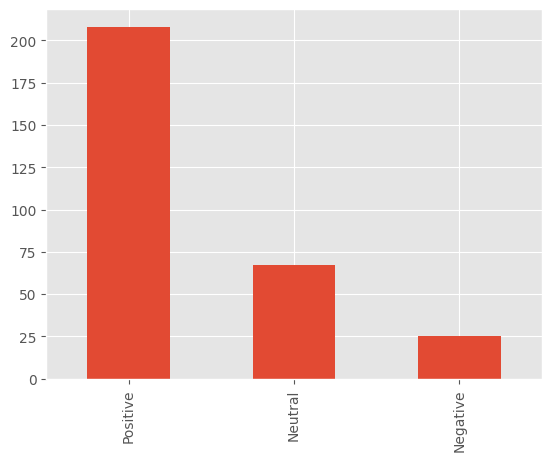

In [ ]:
df.status.value_counts().plot(kind = "bar")

In [ ]:
df.tail()

,firm,date_review,job_title,current,location,overall rating,work life balance,culture values,diversity inclusion,career opportunities,company benefits,senior mgmt,headline,status
2003,Vodafone,04-08-2019,Senior Data Analyst,Current Employee,Bangalore,4,4.0,3.0,5.0,4.0,4.0,4.0,Learning opportunities. Growing company. Time ...,Positive
2004,Vodafone,5/17/2019,Data Engineer,"Current Employee, more than 5 years",Calcutta,4,4.0,4.0,4.0,4.0,2.0,3.0,Good company for work life balance,Positive
2005,Vodafone,8/30/2019,Data Engineer,Current Employee,Pune,5,4.0,5.0,5.0,4.0,3.0,4.0,"Great place to work, friendly environment but ...",Neutral
2006,Vodafone,03-02-2021,Data Analyst,"Current Employee, more than 3 years",Bangalore,4,4.0,4.0,3.0,4.0,3.0,3.0,Good company employee growth is good and work ...,Positive
2007,Willis-Towers-Watson,02-02-2019,Transaction Processing Associate/Data Analyst,"Current Employee, more than 3 years",Mumbai,5,3.0,5.0,5.0,4.0,3.0,4.0,WTW is a good employer that understands your n...,Positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 1708 to 2007
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   firm                  300 non-null    object 
 1   date_review           300 non-null    object 
 2   job_title             300 non-null    object 
 3   current               300 non-null    object 
 4   location              300 non-null    object 
 5   overall rating        300 non-null    int64  
 6   work life balance     300 non-null    float64
 7   culture values        300 non-null    float64
 8   diversity inclusion   300 non-null    float64
 9   career opportunities  300 non-null    float64
 10  company benefits      300 non-null    float64
 11  senior mgmt           300 non-null    float64
 12  headline              300 non-null    object 
 13  status                300 non-null    object 
dtypes: float64(6), int64(1), object(7)
memory usage: 32.9+ KB


In [ ]:
#checking shape of data
print(df.shape)

(300, 14)


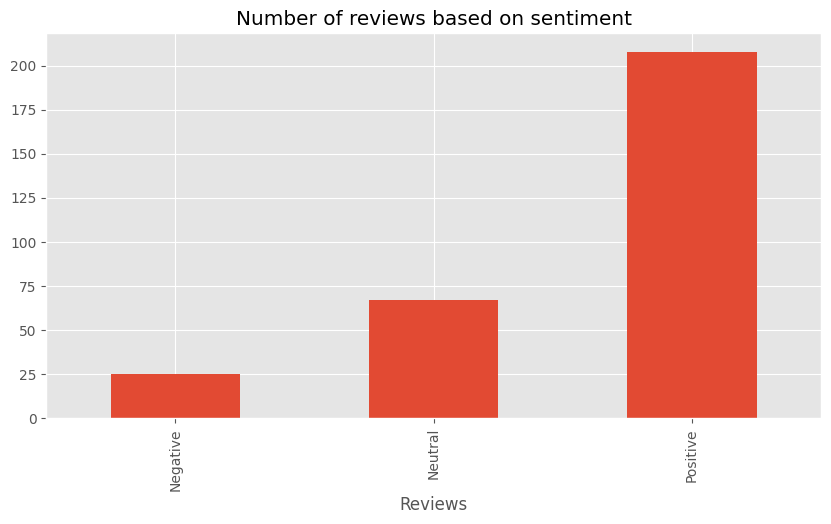

In [ ]:
#create bar plot from data
ax = df['status'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Number of reviews based on sentiment',
          figsize=(10, 5))

ax.set_xlabel('Reviews')
plt.show()

**DATA PREPROCESSING**

In [ ]:
df["headline"] = df["headline"].astype(str)
def toLower(text):
    return text.lower()

df['headline'] = df["headline"].apply(toLower)

In [ ]:
def data_preprocessing(text):
    text = re.sub(r"https\S+|www\S+https\S+","",text,flags = re.MULTILINE)
    text = re.sub(r"\@w+|\#","",text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [ ]:
nltk.download('punkt')
df['headline'] = df["headline"].apply(data_preprocessing)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df.headline.tail(10)

1998                     best company work driven purpose
1999                                culture good vodafone
2000     process driven company takes good care employees
2001    good worklife balance adapting new technologie...
2002           good company drawback regarding low salary
2003    learning opportunities growing company time fl...
2004                       good company work life balance
2005    great place work friendly environment lacking ...
2006    good company employee growth good work life ba...
2007    wtw good employer understands needs meets indu...
Name: headline, dtype: object

In [ ]:
df.headline = df['headline'].apply(data_preprocessing)

In [ ]:
df.headline.tail(10)

1998                     best company work driven purpose
1999                                culture good vodafone
2000     process driven company takes good care employees
2001    good worklife balance adapting new technologie...
2002           good company drawback regarding low salary
2003    learning opportunities growing company time fl...
2004                       good company work life balance
2005    great place work friendly environment lacking ...
2006    good company employee growth good work life ba...
2007    wtw good employer understands needs meets indu...
Name: headline, dtype: object

In [ ]:
# Lets drop the duplicate values

df = df.drop_duplicates('headline')

In [ ]:
df.headline.tail(10)

1998                     best company work driven purpose
1999                                culture good vodafone
2000     process driven company takes good care employees
2001    good worklife balance adapting new technologie...
2002           good company drawback regarding low salary
2003    learning opportunities growing company time fl...
2004                       good company work life balance
2005    great place work friendly environment lacking ...
2006    good company employee growth good work life ba...
2007    wtw good employer understands needs meets indu...
Name: headline, dtype: object

In [ ]:
print(df['headline'].iloc[0],'\n')
print(df['headline'].iloc[1],'\n')
print(df['headline'].iloc[2],'\n')

company need improve various aspects 

work life balance worst working environment 

good work life balance encourages innovation creativity less salary 



**Distribution of sentiments**

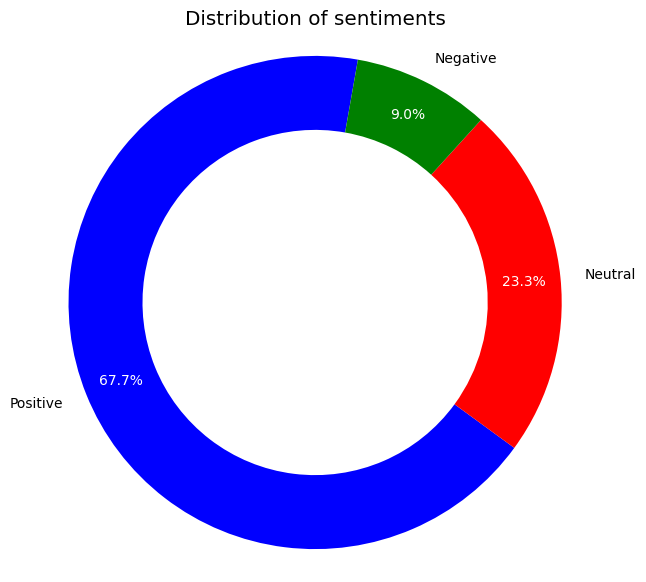

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))

# Set colors for the donut chart
colors = ('blue', 'red', 'green')

# Set the thickness of the donut chart
width = 0.3

# Define the tags variable
tags = df['status'].value_counts()

# Create the donut chart
_, _, autotexts = ax.pie(tags, labels=tags.index, colors=colors,
                          autopct='%1.1f%%', startangle=80, wedgeprops=dict(width=width),
                          pctdistance=0.85, labeldistance=1.1)

# Set the properties of the text inside the donut chart
for autotext in autotexts:
    autotext.set_color('white')

# Create a white circle in the center to make it a donut chart
center_circle = plt.Circle((0, 0), 0.50, fc='white')
fig.gca().add_artist(center_circle)

# Set the title and aspect ratio
plt.title('Distribution of sentiments')
plt.axis('equal')

# Display the donut chart
plt.show()



**POSITIVE sentimets Word Cloud**

In [ ]:
positive_com = df[df.status == 'Positive']
positive_com.tail()

,firm,date_review,job_title,current,location,overall rating,work life balance,culture values,diversity inclusion,career opportunities,company benefits,senior mgmt,headline,status
2001,Vodafone,10-08-2018,Data privacy officer,"Current Employee, more than 3 years",Pune,3,3.0,3.0,5.0,3.0,3.0,3.0,good worklife balance adapting new technologie...,Positive
2003,Vodafone,04-08-2019,Senior Data Analyst,Current Employee,Bangalore,4,4.0,3.0,5.0,4.0,4.0,4.0,learning opportunities growing company time fl...,Positive
2004,Vodafone,5/17/2019,Data Engineer,"Current Employee, more than 5 years",Calcutta,4,4.0,4.0,4.0,4.0,2.0,3.0,good company work life balance,Positive
2006,Vodafone,03-02-2021,Data Analyst,"Current Employee, more than 3 years",Bangalore,4,4.0,4.0,3.0,4.0,3.0,3.0,good company employee growth good work life ba...,Positive
2007,Willis-Towers-Watson,02-02-2019,Transaction Processing Associate/Data Analyst,"Current Employee, more than 3 years",Mumbai,5,3.0,5.0,5.0,4.0,3.0,4.0,wtw good employer understands needs meets indu...,Positive


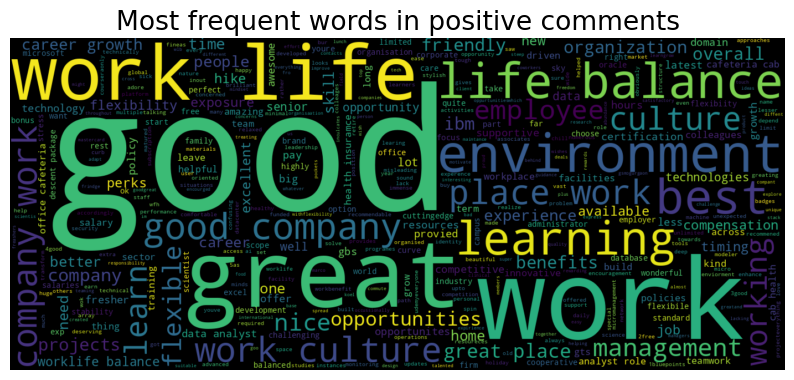

In [ ]:
text = ' '.join([word for word in positive_com['headline']])
plt.figure(figsize = (10,10), facecolor='None')
wordcloud = WordCloud(max_words=400, width=1400, height=600).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive comments', fontsize=19)
plt.show()

**NEGATIVE sentimets Word Cloud**

In [ ]:
negative_com = df[df.status == 'Negative']
negative_com.tail()

,firm,date_review,job_title,current,location,overall rating,work life balance,culture values,diversity inclusion,career opportunities,company benefits,senior mgmt,headline,status
1904,McKinsey-and-Company,5/18/2021,Junior Data Analyst,Current Employee,"Gurgaon, Haryana, Haryana",1,1.0,1.0,1.0,2.0,4.0,1.0,huge micromanagement daily checkins unorganise...,Negative
1949,Oracle,10-06-2020,Senior Database Administrator,Current Employee,Ahmedabad,4,3.0,4.0,4.0,2.0,4.0,3.0,lack proper career growth,Negative
1961,Oracle,3/30/2021,Senior Oracle Applications Database Administr...,"Current Employee, more than 3 years",Bangalore,2,4.0,4.0,3.0,3.0,2.0,1.0,proper management styleteamwork poor increments,Negative
1969,PwC,8/20/2020,Data Analyst,Current Employee,Noida,1,2.0,1.0,2.0,1.0,1.0,1.0,benefit work worst hr ever,Negative
1993,Thomson-Reuters,02-06-2021,Senior Database Engineer,"Current Employee, more than 8 years",Bangalore,5,3.0,5.0,4.0,4.0,5.0,3.0,need improve aspects,Negative


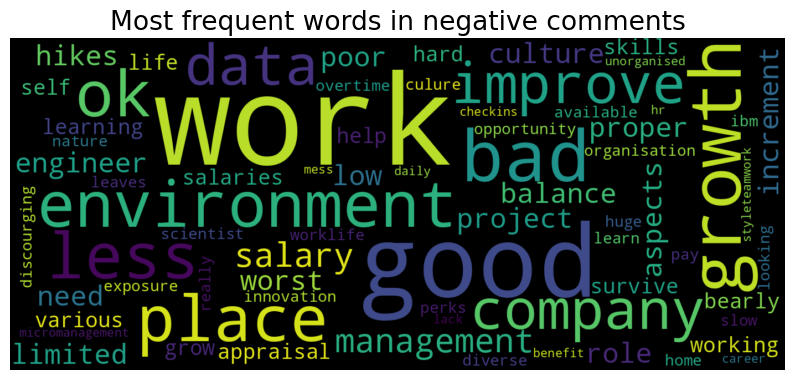

In [ ]:
text = ' '.join([word for word in negative_com['headline']])
plt.figure(figsize = (10,10), facecolor='None')
wordcloud = WordCloud(max_words=400, width=1400, height=600).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative comments', fontsize=19)
plt.show()

**NEUTRAL sentimets Word Cloud**

In [ ]:
neutral_com = df[df.status == 'Neutral']
neutral_com.tail()

,firm,date_review,job_title,current,location,overall rating,work life balance,culture values,diversity inclusion,career opportunities,company benefits,senior mgmt,headline,status
1972,PwC,11-09-2020,Data Analyst,"Current Employee, more than 1 year","Gurgaon, Haryana, Haryana",2,4.0,3.0,2.0,3.0,3.0,2.0,work life balance office location good technol...,Neutral
1981,SAP,5/29/2021,Data Scientist,"Current Employee, less than 1 year",Bangalore,3,4.0,3.0,4.0,3.0,3.0,3.0,good place work place less growth compared market,Neutral
1983,Tesco,1/14/2020,Principal Database Administrator,"Current Employee, less than 1 year",Bangalore,4,3.0,4.0,4.0,4.0,1.0,5.0,travel time much employee engagement good,Neutral
2002,Vodafone,11-05-2018,Lead Data Scientist,"Current Employee, more than 1 year",Pune,4,4.0,4.0,3.0,4.0,4.0,4.0,good company drawback regarding low salary,Neutral
2005,Vodafone,8/30/2019,Data Engineer,Current Employee,Pune,5,4.0,5.0,5.0,4.0,3.0,4.0,great place work friendly environment lacking ...,Neutral


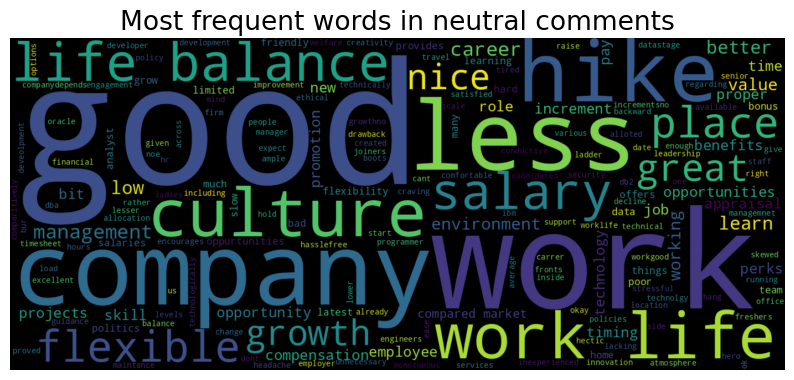

In [ ]:
text = ' '.join([word for word in neutral_com['headline']])
plt.figure(figsize = (10,10), facecolor='None')
wordcloud = WordCloud(max_words=400, width=1400, height=600).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in neutral comments', fontsize=19)
plt.show()

In [ ]:
count_vectorizer=CountVectorizer()
feature_vector=count_vectorizer.fit(df.headline)
features=feature_vector.get_feature_names_out()
print("Total number of features:",len(features))

Total number of features: 570


**Random features extracted from headline**

In [ ]:
import random
random.sample(list(features),15)

['bearly',
 'transform',
 'required',
 'database',
 'excel',
 'companydepends',
 'almost',
 'oracle',
 'personal',
 '4good',
 'maintance',
 'colleages',
 'funded',
 'increment',
 'expect']

In [ ]:
train_ds_features=count_vectorizer.transform(df.headline)
type(train_ds_features)

scipy.sparse._csr.csr_matrix

In [ ]:
train_ds_features.shape

(279, 570)

In [ ]:
train_ds_features.getnnz()

2056

In [ ]:
train_ds_df=pd.DataFrame(train_ds_features.todense())
train_ds_df.columns=features

In [ ]:
df[10:11]

,firm,date_review,job_title,current,location,overall rating,work life balance,culture values,diversity inclusion,career opportunities,company benefits,senior mgmt,headline,status
1721,IBM,5/25/2018,Data Scientist,"Current Employee, more than 1 year",Bangalore,5,4.0,4.0,4.0,3.0,3.0,4.0,wonderful company beautiful work culture nature,Positive


In [ ]:
train_ds_df.iloc[10:11,150:160]

,engineer,engineers,enhance,enough,enviorment,environment,ethical,even,ever,every
10,0,0,0,0,0,0,0,0,0,0


In [ ]:
features_counts=np.sum(train_ds_features.toarray(),axis=0)
feature_counts_df=pd.DataFrame(dict(features=features,counts=features_counts))

**Frequency of features and removing low frequency words**

In [ ]:
len(feature_counts_df[feature_counts_df.counts == 1])

355

Text(0, 0.5, 'Density')

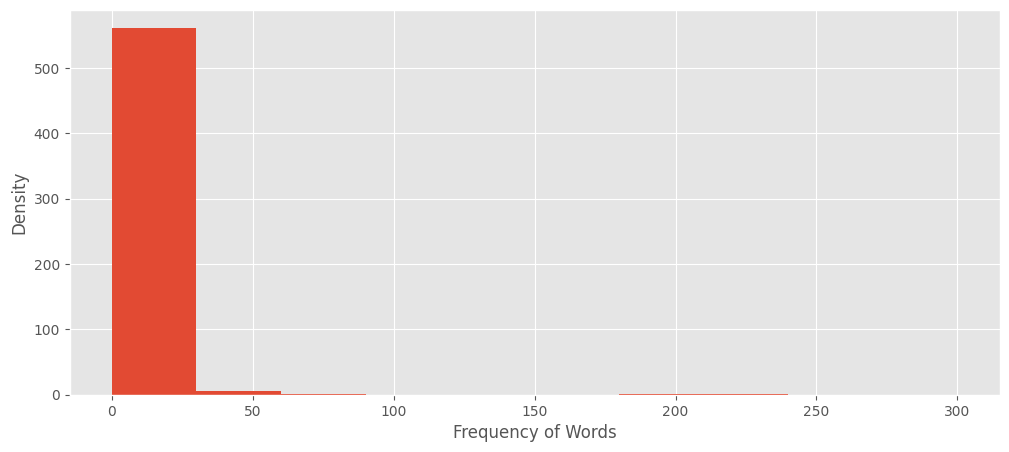

In [ ]:
plt.figure(figsize=(12,5))
plt.hist(feature_counts_df.counts,bins=10,range=(0,300))
plt.xlabel('Frequency of Words')
plt.ylabel('Density')

In [ ]:
# Set the minimum frequency threshold (e.g., remove words that appear less than 5 times)
min_frequency = 5

# Create a list of words that meet the frequency threshold
high_frequency_words = feature_counts[feature_counts["counts"] >= min_frequency]["features"].tolist()

# Assuming 'text_data' is a list of strings representing your text data
# You can preprocess your text data to remove punctuation, convert to lowercase, etc.

# Remove low-frequency words from the text data
filtered_text_data = [" ".join([word for word in text.split() if word in high_frequency_words]) for text in 'headline']

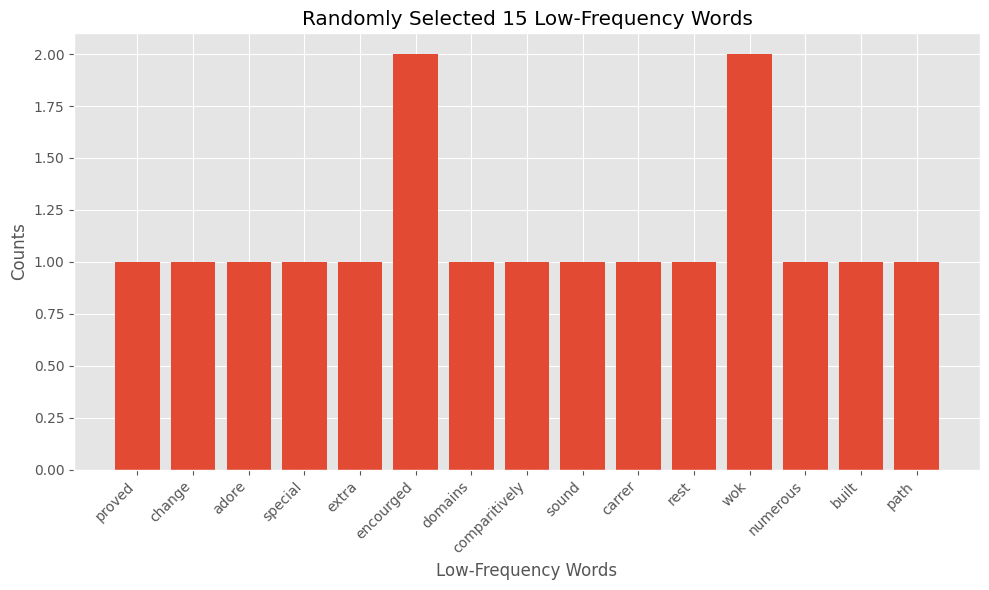

In [ ]:
# Set the minimum frequency threshold (e.g., words that appear less than 5 times will be considered low-frequency)
min_frequency = 5

# Filter the feature_counts DataFrame to get low-frequency words
low_frequency_words = feature_counts[feature_counts["counts"] < min_frequency]

# Randomly select 15 low-frequency words
random.seed(42)  # For reproducibility, set a seed for the random generator
random_low_frequency_words = random.sample(low_frequency_words["features"].tolist(), 15)

# Create the bar graph for the randomly selected 15 low-frequency words
plt.figure(figsize=(10, 6))
plt.bar(random_low_frequency_words, low_frequency_words.loc[low_frequency_words["features"].isin(random_low_frequency_words), "counts"])
plt.xlabel("Low-Frequency Words")
plt.ylabel("Counts")
plt.title("Randomly Selected 15 Low-Frequency Words")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
len(feature_counts_df[feature_counts_df.counts==1])

355

In [ ]:
feature_counts.sort_values("counts",ascending=False)[0:15]

,features,counts
191,good,238
522,work,205
77,company,81
97,culture,55
194,great,51
34,balance,46
271,life,43
361,place,42
145,environment,35
266,learning,27


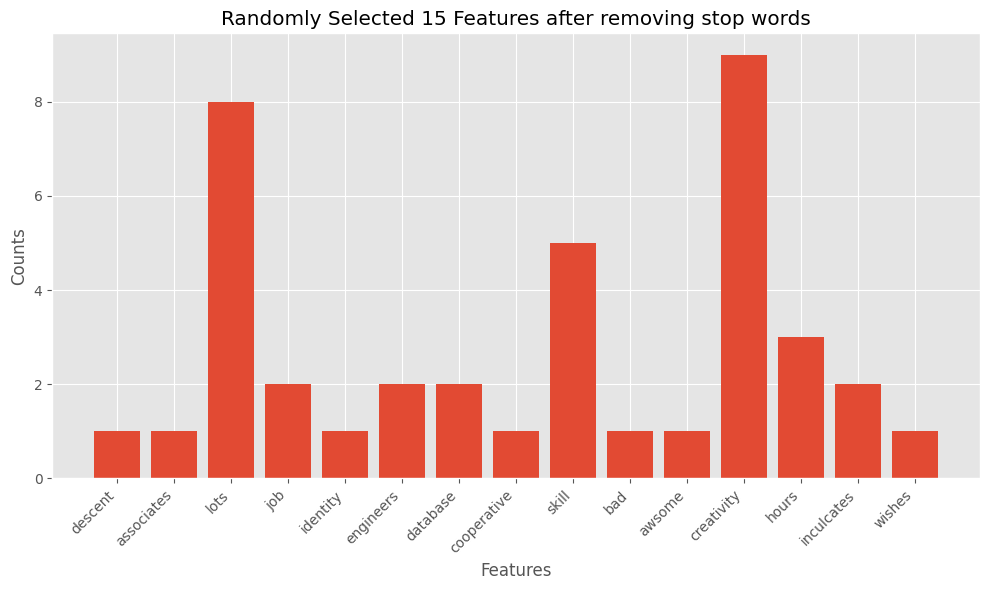

In [ ]:
# Set a seed for reproducibility
random.seed(42)

# Randomly select 15 features from the feature_counts DataFrame
random_features = random.sample(feature_counts["features"].tolist(), 15)
random_features_counts = feature_counts.loc[feature_counts["features"].isin(random_features), "counts"]

# Create the bar graph for the randomly selected 15 features
plt.figure(figsize=(10, 6))
plt.bar(random_features, random_features_counts)
plt.xlabel("Features")
plt.ylabel("Counts")
plt.title("Randomly Selected 15 Features after removing stop words")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


**intializing count vectorizer and removing stop words**

In [ ]:
count_vectorizer=CountVectorizer(max_features=1000)
feature_vector=count_vectorizer.fit(df.headline)
features=feature_vector.get_feature_names_out()
train_ds_features=count_vectorizer.transform(df.headline)
features_counts=np.sum(train_ds_features.toarray(),axis=0)
feature_counts=pd.DataFrame(dict(features=features,counts=features_counts))

In [ ]:
feature_counts.sort_values('counts',ascending=False)[0:15]

,features,counts
207,good,238
557,work,205
84,company,81
105,culture,55
210,great,51
39,balance,46
288,life,43
386,place,42
155,environment,35
285,less,28


In [ ]:
from sklearn.feature_extraction import text
my_stop_words=text.ENGLISH_STOP_WORDS
print("Few stop words are:",list(my_stop_words)[0:10])

Few stop words are: ['became', 'above', 'the', 'our', 'itself', 'already', 'thus', 'five', 'amoungst', 'few']


In [ ]:
count_vectorizer=CountVectorizer(stop_words=list(my_stop_words),max_features=1000)
feature_vector=count_vectorizer.fit(df.headline)
train_ds_features=count_vectorizer.transform(df.headline)
features=feature_vector.get_feature_names_out()
features_counts=np.sum(train_ds_features.toarray(),axis=0)
feature_counts=pd.DataFrame(dict(features=features,counts=features_counts))

In [ ]:
feature_counts.sort_values("counts",ascending=False)[0:15]

,features,counts
191,good,238
522,work,205
77,company,81
97,culture,55
194,great,51
34,balance,46
271,life,43
361,place,42
145,environment,35
266,learning,27


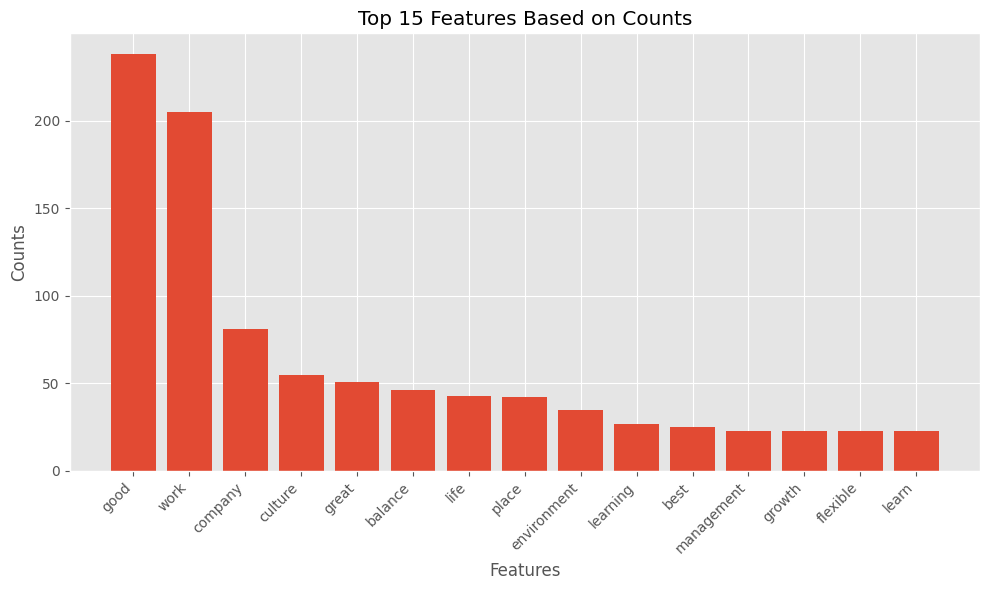

In [ ]:
# Sort the DataFrame by counts in descending order and select the top 15 features
top_features = feature_counts.sort_values("counts", ascending=False).head(15)

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_features["features"], top_features["counts"])
plt.xlabel("Features")
plt.ylabel("Counts")
plt.title("Top 15 Features Based on Counts")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


**Stemming process**

In [ ]:
stemmer=PorterStemmer
analyzer=CountVectorizer().build_analyzer()
def stemmed_words(doc):
  stemmed_words=[stemmer.stem(w) for w in analyzer(doc)]
  non_stop_words=[word for word in stemmed_words if not my_stop_words]
  return non_stop_words

In [ ]:
count_vectorizer=CountVectorizer(stop_words=list(my_stop_words),max_features=1000)
feature_vector=count_vectorizer.fit(df.headline)
train_ds_features=count_vectorizer.transform(df.headline)
features=feature_vector.get_feature_names_out()
features_counts=np.sum(train_ds_features.toarray(),axis=0)
feature_counts=pd.DataFrame(dict(features=features,counts=features_counts))

,features,counts
191,good,238
522,work,205
77,company,81
97,culture,55
194,great,51
34,balance,46
271,life,43
361,place,42
145,environment,35
266,learning,27


In [ ]:
train_ds_df=pd.DataFrame(train_ds_features.todense())
train_ds_df.columns=features
df.status

1708    Negative
1709    Negative
1710     Neutral
1711     Neutral
1712    Positive
          ...   
2003    Positive
2004    Positive
2005     Neutral
2006    Positive
2007    Positive
Name: status, Length: 279, dtype: object

**Training the model using bernoulli and multinomial navie bayes alogorithm**

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(train_ds_features,df.status, test_size=0.5, random_state=42)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
nb_clf=BernoulliNB()
nb_clf.fit(train_X.toarray(),train_y)

BernoulliNB()

In [ ]:
test_ds_predicted=nb_clf.predict(test_X.toarray())

In [ ]:
from sklearn import metrics
print(metrics.classification_report(test_y,test_ds_predicted))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         7
     Neutral       0.00      0.00      0.00        31
    Positive       0.72      0.95      0.82       102

    accuracy                           0.69       140
   macro avg       0.24      0.32      0.27       140
weighted avg       0.52      0.69      0.60       140



<Axes: >

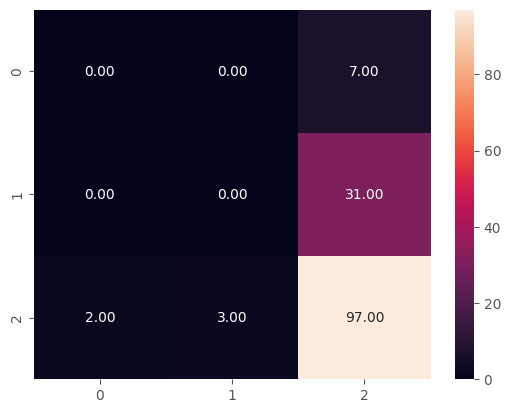

In [ ]:
cm=metrics.confusion_matrix(test_y,test_ds_predicted)
sns.heatmap(cm,annot=True,fmt='.2f')

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(train_ds_features,df.status, test_size=0.4, random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_clf=MultinomialNB()
nb_clf.fit(train_X.toarray(),train_y)

MultinomialNB()

In [ ]:
test_ds_predicted=nb_clf.predict(test_X.toarray())

In [ ]:
from sklearn import metrics
print(metrics.classification_report(test_y,test_ds_predicted))

              precision    recall  f1-score   support

    Negative       0.12      0.25      0.17         4
     Neutral       0.50      0.15      0.24        26
    Positive       0.77      0.90      0.83        82

    accuracy                           0.71       112
   macro avg       0.47      0.44      0.41       112
weighted avg       0.68      0.71      0.67       112



<Axes: >

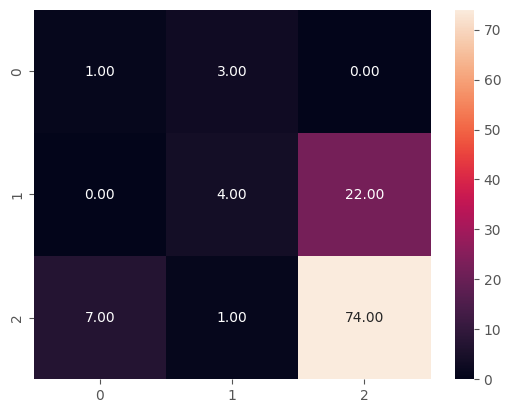

In [ ]:
cm=metrics.confusion_matrix(test_y,test_ds_predicted)
sns.heatmap(cm,annot=True,fmt='.2f')